# ****Exploratory  Data****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
df = pd.read_csv('/kaggle/input/netflix-customer-churn-dataset/netflix_customer_churn.csv')

In [3]:
df.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


In [4]:
df.tail()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
4995,44f3ba44-b95d-4e50-a786-bac4d06f4a43,19,Female,Basic,49.17,11,Europe,Desktop,8.99,0,Credit Card,4,4.10,Drama
4996,18779bcb-ba2b-41da-b751-e70b812061ec,67,Female,Basic,9.24,2,North America,Desktop,8.99,0,PayPal,3,3.08,Documentary
4997,3f32e8c5-615b-4a3b-a864-db2688f7834f,66,Male,Standard,16.55,49,South America,Desktop,13.99,1,Debit Card,2,0.33,Action
4998,7b0ad82d-6571-430e-90f4-906259e0e89c,59,Female,Basic,9.12,3,Europe,Laptop,8.99,0,Credit Card,4,2.28,Sci-Fi
4999,82aeef39-ddb0-40ad-bae1-5c436e0cf042,57,Male,Basic,1.62,17,Africa,Mobile,8.99,1,Crypto,2,0.09,Action


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             5000 non-null   object 
 1   age                     5000 non-null   int64  
 2   gender                  5000 non-null   object 
 3   subscription_type       5000 non-null   object 
 4   watch_hours             5000 non-null   float64
 5   last_login_days         5000 non-null   int64  
 6   region                  5000 non-null   object 
 7   device                  5000 non-null   object 
 8   monthly_fee             5000 non-null   float64
 9   churned                 5000 non-null   int64  
 10  payment_method          5000 non-null   object 
 11  number_of_profiles      5000 non-null   int64  
 12  avg_watch_time_per_day  5000 non-null   float64
 13  favorite_genre          5000 non-null   object 
dtypes: float64(3), int64(4), object(7)
memor

In [6]:
df['churned'].value_counts()

churned
1    2515
0    2485
Name: count, dtype: int64

In [7]:
df['subscription_type'].value_counts()

subscription_type
Premium     1693
Basic       1661
Standard    1646
Name: count, dtype: int64

In [8]:
df['device'].value_counts()

device
Tablet     1048
Laptop     1006
Mobile     1004
TV          993
Desktop     949
Name: count, dtype: int64

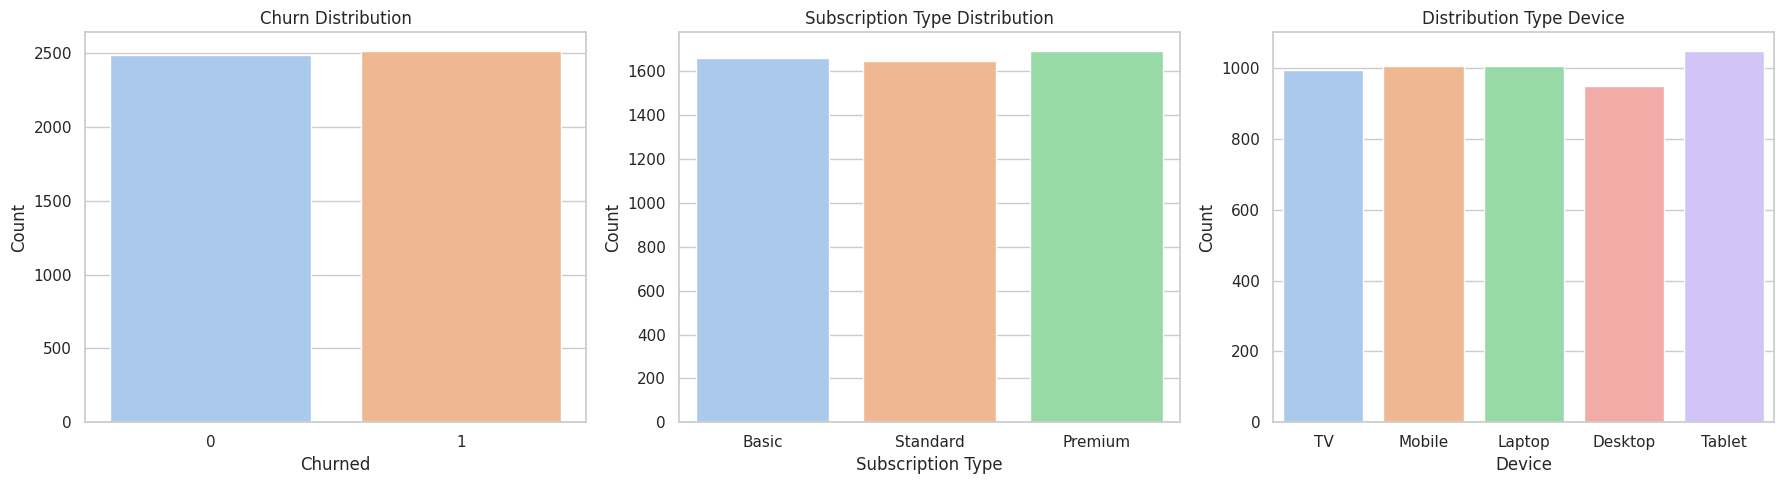

In [9]:
sns.set_theme(style = "whitegrid", palette = "pastel")
plt.figure(figsize=(18,5))

#plot for churn
plt.subplot(1,3,1)
sns.countplot(x = 'churned', data=df)
plt.title('Churn Distribution')
plt.xlabel('Churned')
plt.ylabel('Count')

#plot for subscription_type
plt.subplot(1,3,2)
sns.countplot(x = 'subscription_type', data=df)
plt.title('Subscription Type Distribution')
plt.xlabel('Subscription Type')
plt.ylabel('Count')

#plot for device
plt.subplot(1,3,3)
sns.countplot(x = 'device', data=df)
plt.title('Distribution Type Device')
plt.xlabel('Device')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

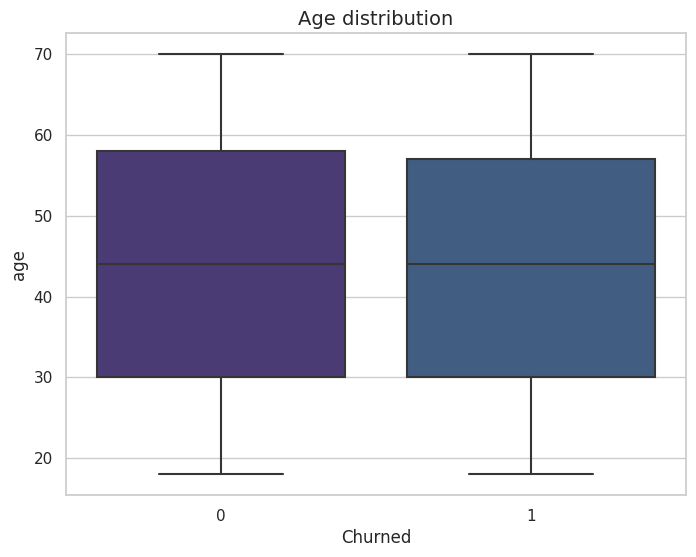

In [10]:
sns.set_theme(style="whitegrid", palette="viridis")
plt.figure(figsize=(8, 6))
sns.boxplot(x='churned', y='age', data=df)
plt.title('Age distribution', fontsize=14)
plt.xlabel('Churned')
plt.ylabel('age')
plt.show()

# Preprocessing

In [11]:
X = df.drop(['customer_id', 'churned'], axis = 1)
y = df['churned']

categorical_cols = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

model_columns = X_encoded.columns
joblib.dump(model_columns, 'model_columns.pkl')

X_encoded.head()

,age,watch_hours,last_login_days,monthly_fee,number_of_profiles,avg_watch_time_per_day,gender_Male,gender_Other,subscription_type_Premium,subscription_type_Standard,...,payment_method_Crypto,payment_method_Debit Card,payment_method_Gift Card,payment_method_PayPal,favorite_genre_Comedy,favorite_genre_Documentary,favorite_genre_Drama,favorite_genre_Horror,favorite_genre_Romance,favorite_genre_Sci-Fi
0,51,14.73,29,8.99,1,0.49,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
1,47,0.70,19,13.99,5,0.03,False,True,False,True,...,False,False,True,False,False,False,False,False,False,True
2,27,16.32,10,13.99,2,1.48,False,False,False,True,...,True,False,False,False,False,False,True,False,False,False
3,53,4.51,12,17.99,2,0.35,False,True,True,False,...,True,False,False,False,False,False,False,True,False,False
4,56,1.89,13,13.99,2,0.13,False,True,False,True,...,True,False,False,False,False,False,False,False,False,False


In [12]:
X_encoded.tail()

,age,watch_hours,last_login_days,monthly_fee,number_of_profiles,avg_watch_time_per_day,gender_Male,gender_Other,subscription_type_Premium,subscription_type_Standard,...,payment_method_Crypto,payment_method_Debit Card,payment_method_Gift Card,payment_method_PayPal,favorite_genre_Comedy,favorite_genre_Documentary,favorite_genre_Drama,favorite_genre_Horror,favorite_genre_Romance,favorite_genre_Sci-Fi
4995,19,49.17,11,8.99,4,4.10,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4996,67,9.24,2,8.99,3,3.08,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
4997,66,16.55,49,13.99,2,0.33,True,False,False,True,...,False,True,False,False,False,False,False,False,False,False
4998,59,9.12,3,8.99,4,2.28,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4999,57,1.62,17,8.99,2,0.09,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False


# Model

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [14]:
#spliting data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)


In [15]:
#Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
joblib.dump(rf_model, 'random_forest.pkl')
y_pred_rf = rf_model.predict(X_test)

In [16]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       497
           1       0.98      0.98      0.98       503

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



In [21]:
#xgb model
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
joblib.dump(xgb_model, 'xgboost_model.pkl')
y_pred_xgb = xgb_model.predict(X_test)

In [22]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       497
           1       1.00      0.99      1.00       503

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



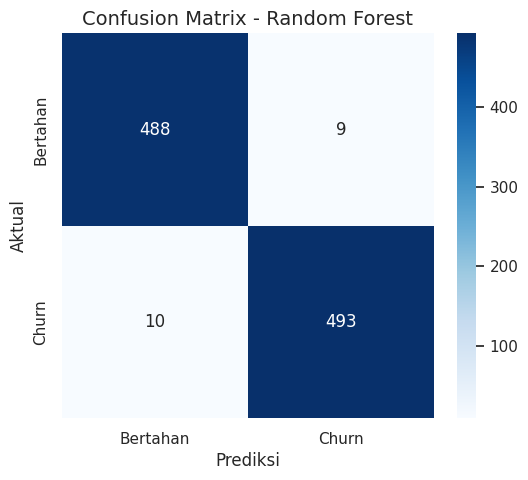

In [24]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Bertahan', 'Churn'], yticklabels=['Bertahan', 'Churn'])
plt.title('Confusion Matrix - Random Forest', fontsize=14)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

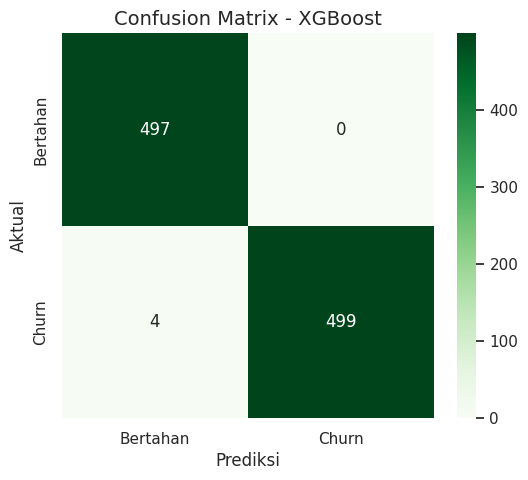

In [26]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens', xticklabels=['Bertahan', 'Churn'], yticklabels=['Bertahan', 'Churn'])
plt.title('Confusion Matrix - XGBoost', fontsize=14)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

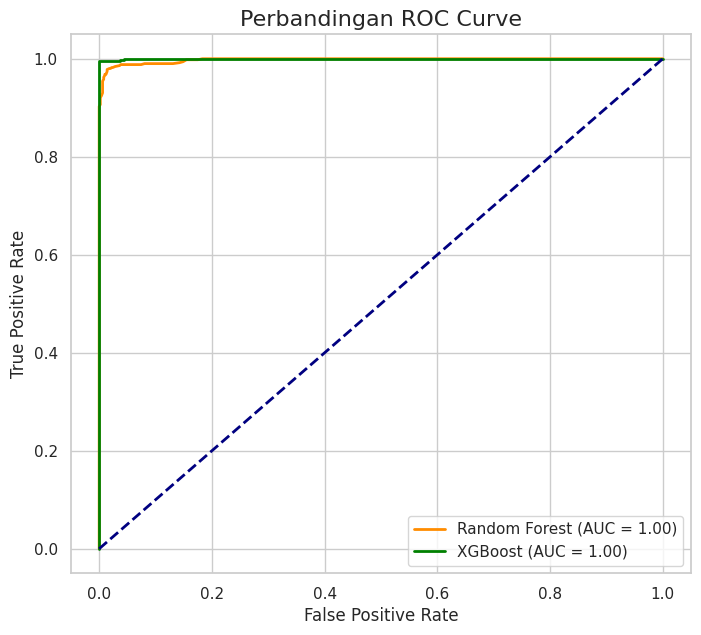

In [27]:
plt.figure(figsize=(8, 7))

#  Plot untuk Random Forest 
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

#  Plot for XGBoost 
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:,1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.plot(fpr_xgb, tpr_xgb, color='green', lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Perbandingan ROC Curve', fontsize=16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# Testing

In [1]:
def get_prediction(input_df, model, columns):
    input_processed = pd.get_dummies(input_df)
    input_final = input_processed.reindex(columns=columns, fill_value=0)
    prediction = model.predict(input_final)[0]
    probability = model.predict_proba(input_final)[0]
    return prediction, probability

model_to_test = joblib.load('xgboost_model.pkl')
model_columns = joblib.load('model_columns.pkl')
df = pd.read_csv('/kaggle/input/netflix-customer-churn-dataset/netflix_customer_churn.csv')

sample_index = 100
sample_data = df.iloc[[sample_index]]
X_sample = sample_data.drop(['customer_id', 'churned'], axis=1)
y_actual = sample_data['churned'].iloc[0]

pred, proba = get_prediction(X_sample, model_to_test, model_columns)

print(f"Index {sample_index}: Actual({y_actual})")
print(f"Prediksi({pred})")

NameError: name 'joblib' is not defined